In [685]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [686]:
data_train=pd.read_excel('Data_Train.xlsx')
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [687]:
data_train.shape

(10683, 11)

In [688]:
data_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [689]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [690]:
data_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [691]:
data_test=pd.read_excel('Test_set.xlsx')
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [692]:
data_test.shape

(2671, 10)

In [693]:
data=data_train.append(data_test)

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_80351/3856331454.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data_train.append(data_test)


In [694]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [695]:
data.shape

(13354, 11)

In [696]:
#feature enginnering 

In [697]:
for i in data['Date_of_Journey']:
    print(i.split('/')[1])

03
05
06
05
03
06
03
03
03
05
06
04
06
05
04
03
04
06
06
05
03
03
04
05
05
06
06
05
06
06
06
05
04
06
05
06
05
05
03
06
05
03
05
05
03
03
05
05
05
06
03
05
03
06
04
03
03
03
05
03
06
04
06
05
05
06
04
05
05
03
06
03
06
06
03
03
04
04
06
03
06
03
05
06
05
03
06
06
04
05
05
03
03
03
04
06
05
06
06
06
05
06
06
05
05
05
03
03
05
05
03
04
05
03
06
05
03
03
06
05
04
05
05
03
05
05
06
05
06
06
03
06
05
06
05
05
06
06
05
03
04
06
06
06
05
05
06
04
06
06
04
03
06
05
05
05
06
03
05
03
05
03
06
05
06
05
03
05
03
05
04
04
06
06
05
06
04
05
05
05
06
03
05
05
05
06
06
06
06
06
03
03
06
06
03
06
06
06
03
03
03
06
04
05
06
04
03
06
05
05
05
06
06
06
06
06
06
06
05
06
04
06
03
05
06
06
03
04
05
05
03
04
05
03
05
05
03
05
03
06
03
06
06
06
03
04
06
05
06
06
03
06
05
03
03
03
05
06
06
06
06
03
03
03
05
03
06
06
03
03
05
06
06
06
04
03
03
06
03
06
06
03
05
06
05
05
05
06
05
03
03
03
06
03
05
05
03
03
06
05
05
06
05
06
03
03
03
06
06
04
05
06
06
03
03
06
05
06
06
03
06
06
06
03
05
05
05
03
03
03
06
03
04
0

In [698]:
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

In [699]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [700]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [701]:
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [702]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [703]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [704]:
for i in data['Arrival_Time']:
    print(i.split(' ')[0])

01:10
13:15
04:25
23:30
21:35
11:25
10:25
05:05
10:25
19:15
23:00
22:55
13:55
09:20
19:50
19:15
13:15
12:35
19:15
12:35
19:20
13:20
06:50
21:50
08:15
12:35
03:35
12:55
12:35
09:20
09:20
23:15
06:50
12:35
12:35
21:00
20:20
16:45
13:15
19:00
18:10
15:15
19:00
13:55
21:00
08:35
06:50
13:55
11:05
19:00
14:15
10:55
01:10
00:15
02:45
12:00
23:55
09:20
01:30
16:45
21:50
09:25
19:00
01:30
09:20
21:00
12:35
15:25
19:15
15:35
08:30
08:15
19:00
12:35
10:05
12:35
14:30
07:55
12:35
10:35
12:00
22:35
04:40
21:00
19:00
11:25
07:25
04:25
20:45
14:25
22:30
13:20
10:25
19:15
23:20
07:40
08:35
22:50
08:30
12:35
20:45
08:15
04:25
14:35
08:55
04:25
18:50
19:15
19:15
19:00
05:05
21:50
09:05
04:25
12:55
22:30
09:25
01:35
09:40
19:00
08:35
16:25
10:05
19:15
07:40
11:10
08:15
12:00
06:50
17:05
19:50
04:25
17:50
23:10
01:30
19:00
04:25
19:15
08:45
18:50
01:30
07:45
07:25
16:10
00:55
23:35
04:25
09:25
20:00
21:00
00:40
18:50
14:30
20:45
08:15
07:55
12:35
21:45
18:15
04:25
14:25
03:25
13:15
16:10
13:15
04:25
15:2

In [705]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [706]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [707]:
data[data['Route'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [708]:
data['Arr_hr']=data['Arrival_Time'].str.split(':').str[0]
data['Arr_min']=data['Arrival_Time'].str.split(':').str[1]

In [709]:
data['Arr_hr']=data['Arr_hr'].astype(int)
data['Arr_min']=data['Arr_min'].astype(int)

In [710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arr_hr           13354 non-null  int64  
 14  Arr_min          13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [711]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [712]:
data['dep_hr']=data['Dep_Time'].str.split(':').str[0]
data['dep_min']=data['Dep_Time'].str.split(':').str[1]
data['dep_hr']=data['dep_hr'].astype(int)
data['dep_min']=data['dep_min'].astype(int)

In [713]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [714]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [715]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [716]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [717]:
data['Total_Stops'][data['Total_Stops'].isnull()]=1

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_80351/2790170255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Stops'][data['Total_Stops'].isnull()]=1


In [718]:
data['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

In [719]:
data.drop('Route',axis=1,inplace=True)

In [720]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [721]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [722]:
data[data['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50


In [723]:
data.drop(2660,axis=0,inplace=True)

In [724]:
data.drop(6474,axis=0,inplace=True)

In [725]:
data['Duration_hr']=data['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [726]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [727]:
data['Duration_hr']=data['Duration_hr'].astype(int)

In [728]:
data['Duration_hr']=data['Duration_hr']*60

In [729]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240


In [730]:
data['Duration_min']=data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [731]:
data['Duration_min'][data['Duration_min'].isnull()]=0

/var/folders/29/dhhzjs1d5dg7s36xmsff1qb40000gn/T/ipykernel_80351/2620117189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration_min'][data['Duration_min'].isnull()]=0


In [732]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arr_hr                0
Arr_min               0
dep_hr                0
dep_min               0
Duration_hr           0
Duration_min          0
dtype: int64

In [733]:
data.drop(['Duration'],axis=1,inplace=True)

In [734]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45


In [735]:
data['Duration_min']=data['Duration_min'].astype(int)

In [736]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arr_hr           13351 non-null  int64  
 10  Arr_min          13351 non-null  int64  
 11  dep_hr           13351 non-null  int64  
 12  dep_min          13351 non-null  int64  
 13  Duration_hr      13351 non-null  int64  
 14  Duration_min     13351 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 1.6+ MB


# Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

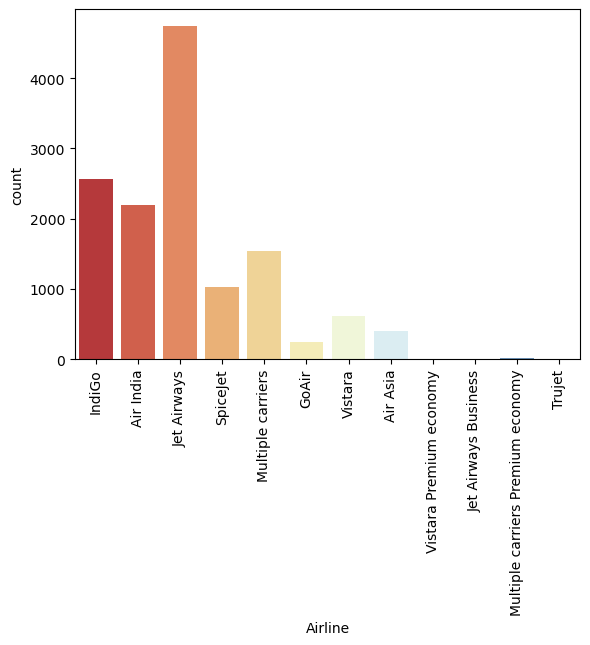

In [737]:
fig = plt.figure(figsize = (30,10))
sub = fig.add_subplot(2,4,7)
sns.countplot(data = data, x = 'Airline', palette = "RdYlBu" ,orient="h")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

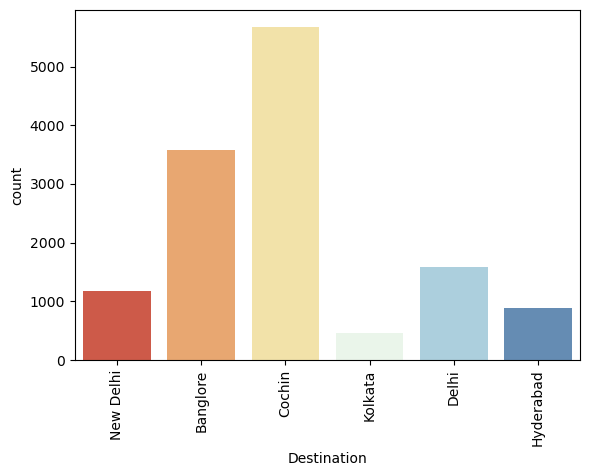

In [738]:
fig = plt.figure(figsize = (30,10))
sub = fig.add_subplot(2,4,7)
sns.countplot(data = data, x = 'Destination', palette = "RdYlBu" ,orient="h")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Destination', ylabel='Source'>

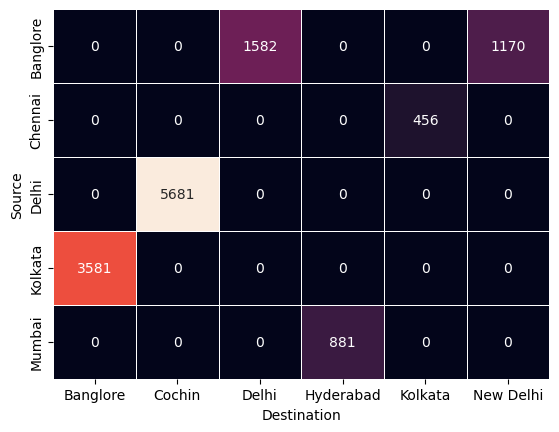

In [739]:
grp = data.groupby(['Source','Destination'])['Destination'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,1)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=False)

In [740]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45


In [741]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arr_hr           13351 non-null  int64  
 10  Arr_min          13351 non-null  int64  
 11  dep_hr           13351 non-null  int64  
 12  dep_min          13351 non-null  int64  
 13  Duration_hr      13351 non-null  int64  
 14  Duration_min     13351 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 1.6+ MB


In [742]:
df_air=pd.get_dummies(data['Airline'],drop_first=True)
df_air

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0,0


In [743]:
data=pd.concat([data,df_air],axis=1)
data.drop(['Airline'],axis=1,inplace=True)
data

,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Kolkata,Banglore,1.0,No info,NaN,6,6,2019,20,25,...,0,0,0,0,0,0,0,0,0,0
2667,Kolkata,Banglore,0.0,No info,NaN,27,3,2019,16,55,...,0,1,0,0,0,0,0,0,0,0
2668,Delhi,Cochin,1.0,No info,NaN,6,3,2019,4,25,...,0,0,1,0,0,0,0,0,0,0
2669,Delhi,Cochin,1.0,No info,NaN,6,3,2019,19,15,...,0,0,0,0,0,0,0,0,0,0


In [744]:
df_source=pd.get_dummies(data['Source'],drop_first=True)
data=pd.concat([data,df_source],axis=1)
data.drop(['Source'],axis=1,inplace=True)

df_d=pd.get_dummies(data['Destination'],drop_first=True)
data=pd.concat([data,df_d],axis=1)
data.drop(['Destination'],axis=1,inplace=True)

In [745]:
data.head()

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,No info,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2.0,No info,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2.0,No info,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1.0,No info,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,No info,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [746]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        13351 non-null  float64
 1   Additional_Info                    13351 non-null  object 
 2   Price                              10681 non-null  float64
 3   Date                               13351 non-null  int64  
 4   Month                              13351 non-null  int64  
 5   Year                               13351 non-null  int64  
 6   Arr_hr                             13351 non-null  int64  
 7   Arr_min                            13351 non-null  int64  
 8   dep_hr                             13351 non-null  int64  
 9   dep_min                            13351 non-null  int64  
 10  Duration_hr                        13351 non-null  int64  
 11  Duration_min                       13351 non-null  int6

In [747]:
data.drop(['Additional_Info'],axis=1,inplace=True)


In [748]:
data[:10683]

,Total_Stops,Price,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,3897.0,24,3,2019,1,10,22,20,120,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662.0,1,5,2019,13,15,5,50,420,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882.0,9,6,2019,4,25,9,25,1140,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218.0,12,5,2019,23,30,18,5,300,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302.0,1,3,2019,21,35,16,50,240,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,0.0,7229.0,27,4,2019,11,20,8,20,180,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648.0,1,3,2019,14,10,11,30,120,...,0,0,0,0,0,0,0,0,0,1
10682,2.0,11753.0,9,5,2019,19,15,10,55,480,...,0,0,1,0,0,1,0,0,0,0
0,1.0,NaN,6,6,2019,4,25,17,30,600,...,0,0,1,0,0,1,0,0,0,0


In [749]:
#model training

In [750]:
Y=data['Price']
Y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
2666        NaN
2667        NaN
2668        NaN
2669        NaN
2670        NaN
Name: Price, Length: 13351, dtype: float64

In [751]:
data.drop(['Price'],axis=1,inplace=True)
data

,Total_Stops,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr,Duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,24,3,2019,1,10,22,20,120,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,2019,13,15,5,50,420,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,2019,4,25,9,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,2019,23,30,18,5,300,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,2019,21,35,16,50,240,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,6,6,2019,20,25,20,30,1380,55,...,0,0,0,1,0,0,0,0,0,0
2667,0.0,27,3,2019,16,55,14,20,120,35,...,0,0,0,1,0,0,0,0,0,0
2668,1.0,6,3,2019,4,25,21,50,360,35,...,0,0,1,0,0,1,0,0,0,0
2669,1.0,6,3,2019,19,15,4,0,900,15,...,0,0,1,0,0,1,0,0,0,0


In [752]:
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
2666        NaN
2667        NaN
2668        NaN
2669        NaN
2670        NaN
Name: Price, Length: 13351, dtype: float64

In [756]:
x=data[:10681]
x

,Total_Stops,Date,Month,Year,Arr_hr,Arr_min,dep_hr,dep_min,Duration_hr,Duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,24,3,2019,1,10,22,20,120,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,2019,13,15,5,50,420,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,2019,4,25,9,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,2019,23,30,18,5,300,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,2019,21,35,16,50,240,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,9,4,2019,22,25,19,55,120,30,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,27,4,2019,23,20,20,45,120,35,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,27,4,2019,11,20,8,20,180,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,1,3,2019,14,10,11,30,120,40,...,0,0,0,0,0,0,0,0,0,1


In [758]:
y=Y[:10681]
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10681, dtype: float64

In [759]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [760]:
print(selection.feature_importances_)

[2.22349595e-01 1.44941607e-01 5.22888625e-02 0.00000000e+00
 2.69796335e-02 1.89009840e-02 2.47940335e-02 2.17254480e-02
 1.18556737e-01 1.77241266e-02 9.77952349e-03 1.97909808e-03
 1.99953199e-02 1.37671364e-01 6.73456540e-02 1.82154022e-02
 8.44920997e-04 3.02901579e-03 1.16737961e-04 4.93622439e-03
 8.09814660e-05 4.20320382e-04 1.38671402e-02 3.38932050e-03
 7.31024385e-03 1.11693872e-02 1.82481787e-02 7.74771536e-03
 5.82383773e-04 2.50100396e-02]


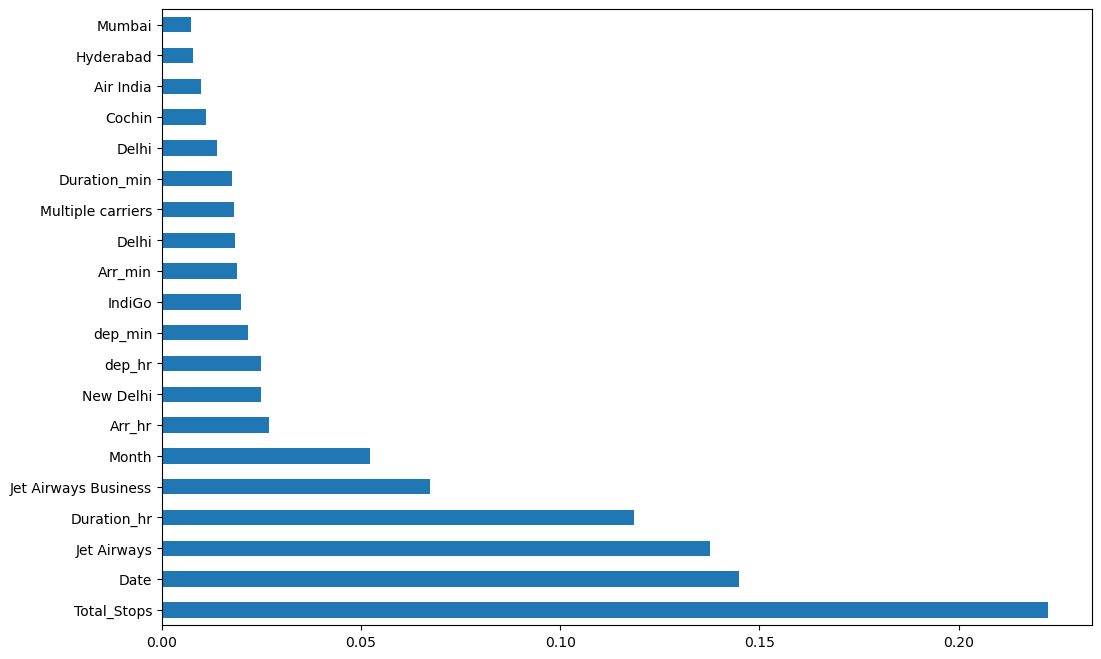

In [762]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
#fitting model

In [763]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [764]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [765]:
y_pred = reg_rf.predict(x_test)

In [766]:
reg_rf.score(x_train, y_train)

0.9539579191875904

In [770]:
reg_rf.score(x_test, y_test)

0.784133996920704

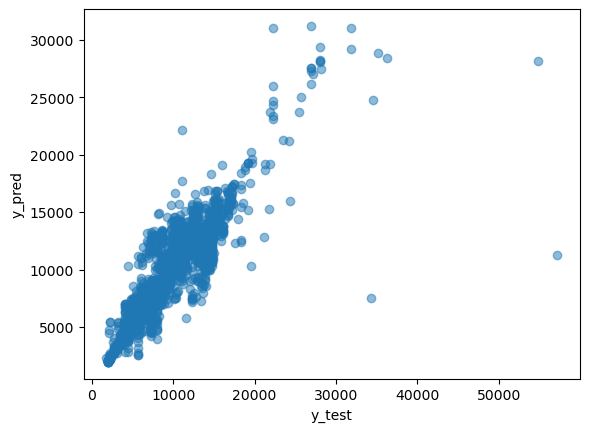

In [768]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()